# Figure 4.2 of rough Heston $\lambda$ paper

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
$$

In [1]:
source("roughHestonAdamsLambda.R")
source("roughHestonPadeLambda.R")

We choose parameters similar to those in Roughening Heston.

In [2]:
params.rHeston <- list(al=.55,H=0.05,nu=0.4,rho=-.65,lam=1)

First, we write a function to generate $D^\alpha h$ using the Adams scheme.  Note that with Giacomo Bormetti's code, we only need 200 steps to get convergence.

In [3]:
dhA.H <- function(H){dhA(list(al=H+1/2,nu=0.4,rho=-.65,lam=1))(n=1000, 3-1i/2, bigT=8)}

Pick a value of $a$ and a range of $t$.

In [4]:
a <- 3 - 1i/2
xx <- 8
x.1k <- xx*(0:1000)/1000

Generate a list of Adams approximations.

In [5]:
dh <- list()

for (i in 0:5){
    H.i <- max(0.1*i,1e-8)
    dh[[i+1]] <- dhA.H(H.i)
}

Make a list of values of $H$.

In [6]:
(H.i <- (0:5)/10 +c(1e-8,rep(-1e-8,5)))

[1] 0.00000001 0.09999999 0.19999999 0.29999999 0.39999999 0.49999999

In [7]:
library(colorspace)
library(repr)
options(repr.plot.width=10,repr.plot.height=10,repr.plot.res=200)
my.col <- sequential_hcl(7, palette="Batlow")

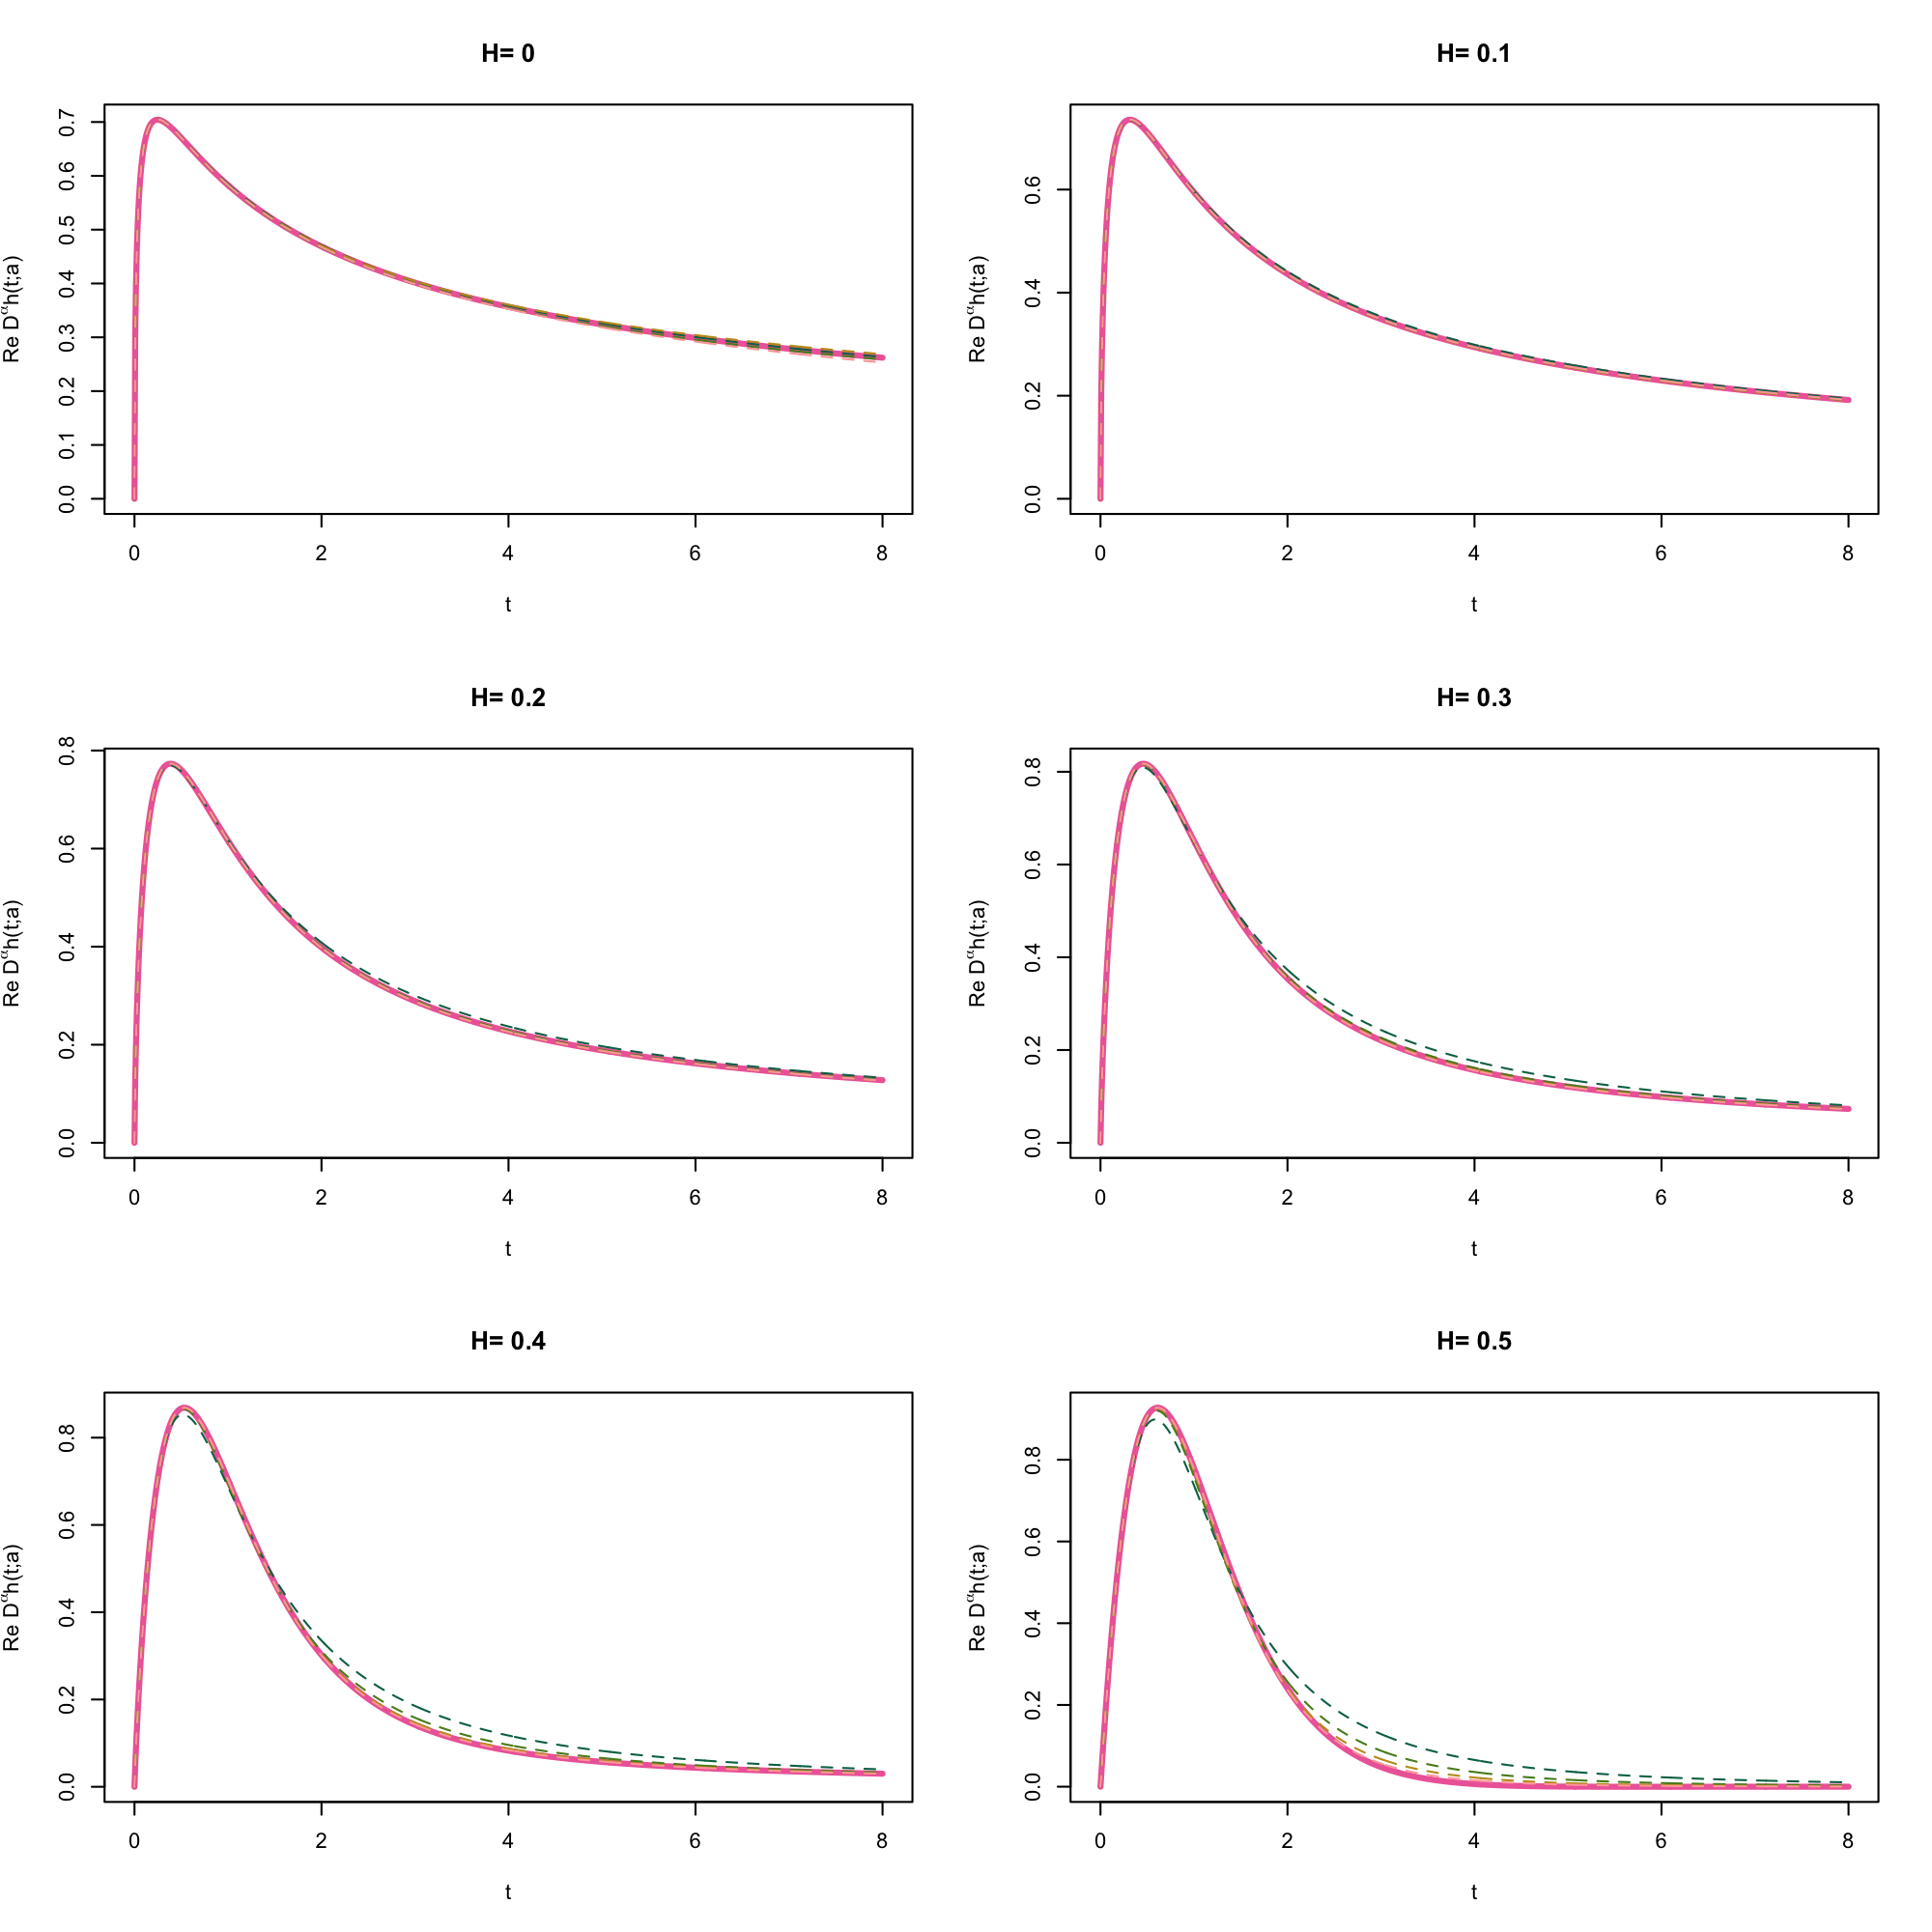

In [8]:
par(mfrow=c(3,2))

mains <- c(0,0.1,0.2,0.3,0.4,0.5)

for (i in 0:5){
    params.i <- list(al=H.i[i+1]+1/2+1e-12,H=H.i[i+1]+1e-12,nu=0.4,rho=-.65,lam=1) 
    plot(x.1k,Im(dh[[i+1]]),type="l",col="hotpink2",lty=1,lwd=3,
     ylab=expression(paste("Re ",D^alpha,"h(t;a)",sep="")),xlab="t",main=paste("H=",mains[i+1]))
    curve(Im(d.h.Pade33(params.i)(a,x)),from=0,to=xx,col=my.col[3],lty=2,lwd=1,n=1000,add=T)
    curve(Im(d.h.Pade44(params.i)(a,x)),from=0,to=xx,col=my.col[4],lty=2,lwd=1,n=1000,add=T)
    curve(Im(d.h.Pade55(params.i)(a,x)),from=0,to=xx,col=my.col[5],lty=2,lwd=1,n=1000,add=T)
    curve(Im(d.h.Pade66(params.i)(a,x)),from=0,to=xx,col=my.col[6],lty=2,lwd=1,n=1000,add=T)
    }

par(mfrow=c(1,1))